# Univariate Linear Regression

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class UnivariateLinearRegressor:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.theta = None
        self.MSE_loss_history = []
        self.theta_history = []
        
    def MSE_loss(self, y_pred, y):
        m = y.shape[0]
        loss = (1 / (2 * m)) * np.sum((y_pred - y)**2)
        return loss
    
    def gradient_descent(self, X, y, y_pred, theta):
        m = y.shape[0]
        # Compute gradients first
        gradient_0 = np.sum(y_pred - y) / m
        gradient_1 = np.sum(np.dot((y_pred - y).T, X[:, 1])) / m

        # Update parameters
        theta[0] = theta[0] - self.learning_rate * gradient_0
        theta[1] = theta[1] - self.learning_rate * gradient_1
        
        return theta
    
    def fit(self, X: np.ndarray, y:np.ndarray) -> np.ndarray:
        """
        Reshape the input X and train the model

        Args:
            X (np.ndarray): Input feature matrix of dimension (n_samples, n_features)
            y (np.ndarray): Label matrix of dimension (n_samples, 1)

        Returns:
            np.ndarray: Parameter: theta matrix of dimension (n_features+1, 1)
        """
        # Add new dimension to X
        new_dimension = np.ones((X.shape[0], 1))
        X = np.hstack((new_dimension, X))

        # Initialize theta
        self.theta = np.zeros((X.shape[1], 1))
        
        # Training loop
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.theta)
            # compute loss
            loss = self.MSE_loss(y_pred, y)
            self.MSE_loss_history.append(loss)
            self.theta_history.append(self.theta)
            
            
            if i % 100 == 0:
                print(f"Iteration {i}: MSE Loss = {loss}")
            
            # use gradient descent
            self.theta = self.gradient_descent(X, y, y_pred, self.theta)
        
        return self.theta
    
    def predict(self, X: np.ndarray, theta: np.ndarray) -> np.ndarray:
        # This function assumes that X has been normalized
        new_dimension = np.ones((X.shape[0], 1))
        X = np.hstack((new_dimension, X))
        predictions = np.dot(X, theta)
        
        return predictions

In [3]:
# Preparing dummy linear data following the equation y = 5 + 0.5x
X = [x for x in range(100)]
y = [5+0.5*i for i in X]

df = pd.DataFrame({"X": X, "y": y})
df.head()
# This dataframe can be saved to csv and read in future
# df.to_csv("linear_univairate_data.csv", index=False)

,X,y
0,0,5.0
1,1,5.5
2,2,6.0
3,3,6.5
4,4,7.0


In [4]:
X = df["X"].values
y = df["y"].values

In [5]:
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (100,)
Shape of y:  (100,)


In [6]:
# Reshaping X and y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (100, 1)
Shape of y:  (100, 1)


In [7]:
# Mean Normalization and Feature scaling
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std


y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std


In [19]:
myModel = UnivariateLinearRegressor(learning_rate=0.01, n_iters=500)
theta = myModel.fit(X, y)

Iteration 0: MSE Loss = 0.5
Iteration 100: MSE Loss = 0.06698983742898083
Iteration 200: MSE Loss = 0.00897527663752258
Iteration 300: MSE Loss = 0.0012025046456555352
Iteration 400: MSE Loss = 0.00016111118144011477


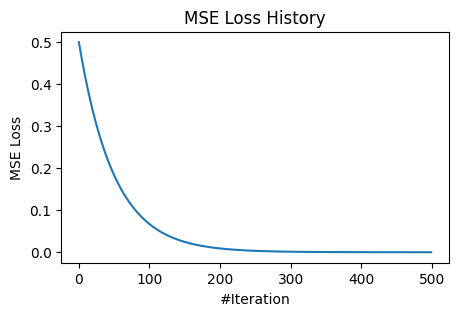

In [20]:
# Plotting Learning Curve
loss_history = myModel.MSE_loss_history
plt.figure(figsize=(5, 3))
sns.lineplot(loss_history)
plt.title("MSE Loss History")
plt.xlabel("#Iteration")
plt.ylabel("MSE Loss")
plt.show()

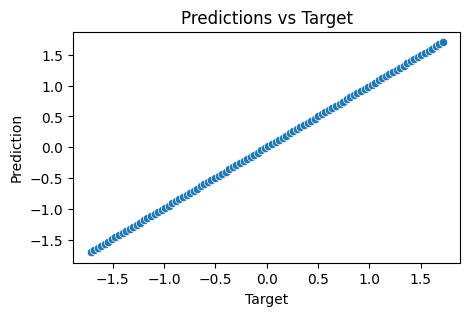

In [21]:
# Plotting predictions vs target
predictions = myModel.predict(X, theta)
plt.figure(figsize=(5, 3))
sns.scatterplot(x=y[:, 0], y=predictions[:, 0])
plt.title("Predictions vs Target")
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.show()

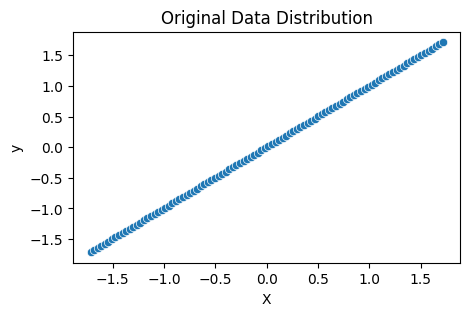

In [11]:
# Original Data Distribution 
plt.figure(figsize=(5, 3))
sns.scatterplot(x=X[:, 0], y=y[:, 0])
plt.title("Original Data Distribution")
plt.xlabel("X")
plt.ylabel("y")
plt.show()